# Задача 1.11

Посмотрим для различных длин кодовых слов $n$ какова скорость потенциальная скорость кода $R$, которую можно оценить с помощью границ Хэмминга, Варшамова–Гилберта и Грея для разного числа исправленных ошибок $t$

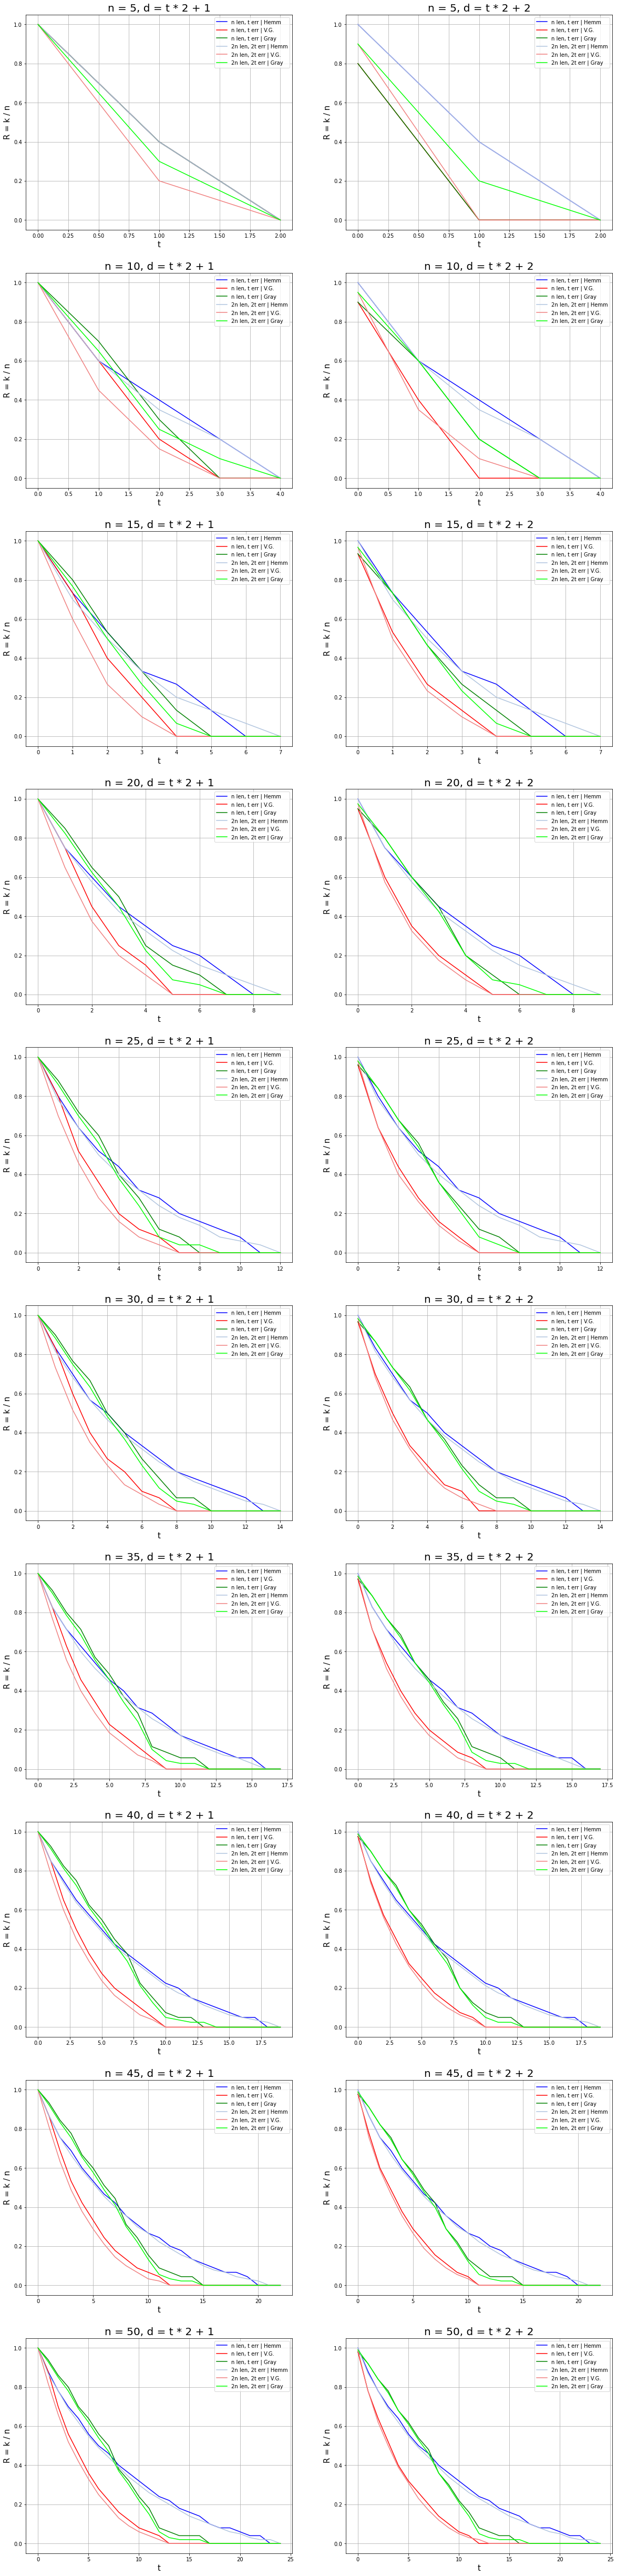

In [2]:
import math
from scipy.special import binom
from math import log2
import matplotlib.pyplot as plt

def bord(n, d):
    # Hemm
    t = (d - 1) // 2
    max_h_k = 0
    for k in range(2, n + 1):
        M = 2 ** k
        if M <= 2 ** n / sum([binom(n, i) for i in range(0, t + 1)]):
            max_h_k = k

    # V.G.
    max_vg_k = 0
    for k in range(2, n + 1):
        if 2 ** (n - k) > sum([binom(n - 1, i) for i in range(d - 1)]):
            max_vg_k = k

    # Gray
    max_g_k = 0
    for k in range(2, n + 1):
        if n >= sum([math.ceil(d / 2 ** i) for i in range(k)]):
            max_g_k = k
    return (max_h_k, max_vg_k, max_g_k)

glob_n = 50
def plot(fig, n, i, ch):
    if ch:
        plus = 1
    else:
        plus = 2
    ind_p = i * 2 + plus
    ax = fig.add_subplot(glob_n, 2, ind_p)
    ax.set_title("n = {}, d = t * 2 + {}".format(n, plus), fontsize=20)
    ax.set_xlabel('t', fontsize=15)
    ax.set_ylabel('R = k / n', fontsize=15)
    
    ks = [[], [], []]
    ks2 = [[], [], []]
    for t in range((n - 1) // 2 + 1):
        d = t * 2 + plus
        h_k, vg_k, g_k = bord(n, d)
        ks[0].append(h_k / n)
        ks[1].append(vg_k / n)
        ks[2].append(g_k / n)
    
        d = t * 4 + plus
        h_k, vg_k, g_k = bord(2 * n, d)
        ks2[0].append(h_k / (2 * n))
        ks2[1].append(vg_k / (2 * n))
        ks2[2].append(g_k / (2 * n))
    
    ts = list(range((n - 1) // 2 + 1))
    ax.plot(ts, ks[0], label="n len, t err | Hemm", color="blue")
    ax.plot(ts, ks[1], label="n len, t err | V.G.", color="red")
    ax.plot(ts, ks[2], label="n len, t err | Gray", color="green")
    ax.plot(ts, ks2[0], label="2n len, 2t err | Hemm", color="lightsteelblue")
    ax.plot(ts, ks2[1], label="2n len, 2t err | V.G.", color="lightcoral")
    ax.plot(ts, ks2[2], label="2n len, 2t err | Gray", color="lime")
    ax.legend()
    ax.grid()


fig = plt.figure(figsize=(20, 450))
cur = 0
for i in range(5, glob_n + 1, 5):
    plot(fig, i, cur, True)
    plot(fig, i, cur, False)
    cur += 1

Можно заметить, что небольших $n$ разница не сильно заметна. Однако при увеличении длины видно, что согласно всем границам, код длины $n$ исправляющий $t$ ошибок имеет чуть-чуть лучшую скорость, чем код длины $2n$ исправляющий $2t$ ошибок. При этом короткий код значительно проще кодировать и декодировать, поэтому по скорости обработки и передачи информации короткий код лучше. 

Но, конечно, длинный код безопаснее, так как исправляет больше ошибок